# Homework 5 - Exploring StackOverflow!

In [2]:
## Import Utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from datetime import datetime, date
import pickle

## 1. Data

Load the data

In [3]:
with open('sx-stackoverflow-a2q.txt') as f:
    a2q = f.readlines()

In [4]:
with open('sx-stackoverflow-c2q.txt') as f:
    c2q = f.readlines()

In [5]:
with open('sx-stackoverflow-c2a.txt') as f:
    c2a = f.readlines()

In [6]:
## Init Graph
G = nx.DiGraph()

In the merged graph we decided to assign the following weigths: 

$\cdot$ 0.6 to *Answers to questions* 

$\cdot$ 0.3 to *Comments to questions* 

$\cdot$ 0.1 to *Comments to answers* 

The reason is that we have thought that the answers to questions are the more relevant than the comments to question, that are more relevant than comments to answers.

In [7]:
## Merge Graph
t_start = datetime(2009, 10, 1)
t_end = datetime(2010, 10, 1)

for line in a2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.6
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.6)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

for line in c2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.3
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.3)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

for line in c2a:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G.has_edge(line[0], line[1]) :
            G[line[0]][line[1]]['weight'] += 0.1
            G[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G.add_edge(line[0], line[1], weight=0.1)
            G[line[0]][line[1]]['timestamp']=[t_truncated]

## 2. Implementation of the backend

## Functionality 1 - Get the overall features of the graph

In [8]:
## Graph 1

## Init
G_a2q = nx.DiGraph()

t_start = datetime(2010, 10, 1)
t_end = datetime(2010, 11, 1)

## Import data
for line in a2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G_a2q.has_edge(line[0], line[1]) :
            G_a2q[line[0]][line[1]]['weight'] += 0.6
            G_a2q[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G_a2q.add_edge(line[0], line[1], weight=0.6)
            G_a2q[line[0]][line[1]]['timestamp']=[t_truncated]

In [9]:
## Graph 2

## Init
G_c2q = nx.DiGraph()

t_start = datetime(2010, 10, 1)
t_end = datetime(2010, 11, 1)

## Import data
for line in c2q:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G_c2q.has_edge(line[0], line[1]) :
            G_c2q[line[0]][line[1]]['weight'] += 0.3
            G_c2q[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G_c2q.add_edge(line[0], line[1], weight=0.3)
            G_c2q[line[0]][line[1]]['timestamp']=[t_truncated]

In [10]:
## Graph 3

## Init
G_c2a = nx.DiGraph()

t_start = datetime(2010, 10, 1)
t_end = datetime(2010, 11, 1)

## Import data
for line in c2a:
    line = line.replace('\n', '')
    line = line.split(' ') 
    t = datetime.fromtimestamp(int(line[2]))
    t_truncated = date(t.year,t.month, t.day)
    if t_start <= t < t_end :
        if G_c2a.has_edge(line[0], line[1]) :
            G_c2a[line[0]][line[1]]['weight'] += 0.1
            G_c2a[line[0]][line[1]]['timestamp'].append(t_truncated)
        else :
            G_c2a.add_edge(line[0], line[1], weight=0.1)
            G_c2a[line[0]][line[1]]['timestamp']=[t_truncated]

#### $\cdot$ Is the graph direct or not?

##### Given a graph G=(V,E), if G is a directed graph the sum of the lengths of all the adjacency list is |E|

In [11]:
def adj(Graph):
    l = []
    for line in nx.generate_adjlist(Graph):
        l.append(line.split(' '))
    return(l)

In [12]:
def is_directed(Graph):
    """
    input:
    - Graph
    return :
    - True if the graph is a directed graph, false otherwise
    
    """
    l=adj(Graph)
    number_nodes=len(list(Graph.nodes))
    sum = 0
    for line in l: 
        sum += len(line)
    if (sum - number_nodes) == len(Graph.edges):  #I subtract the number of nodes because nx.generate_adjlist generates as first element of each list the node we're considering
        return True 
    else:
        return False


In [13]:
print(is_directed(G_a2q))
print(is_directed(G_c2a))
print(is_directed(G_c2q))

True
True
True


In [14]:
# Check
print(nx.is_directed(G_a2q))
print(nx.is_directed(G_c2a))
print(nx.is_directed(G_c2q))

True
True
True


#### $\cdot$ Number of users

The number of users is simply the number of nodes

In [15]:
def n_users(Graph):
    """
    input:
    - Graph
    return :
    - The number of nodes
    """
    l_nodes=list(Graph.nodes)
    n_nodes=len(l_nodes)
    return(n_nodes)

#### $\cdot$ Number of answers/comments

The number of answers/comments is simply the number of edges

In [16]:
def n_answers(Graph):
    """
    input:
    - Graph
    return :
    - The number of edges
    
    """
    l_edges=list(Graph.edges)
    n_edges=len(l_edges)
    return(n_edges)

#### $\cdot$ Average number of links per user

In [17]:
def average(n_edges,n_nodes):
    """
    input:
    - The number of edges
    - The number of nodes 
    return :
    - Average number of links per user
    
    """
    return(n_edges/n_nodes)

#### $\cdot$ Density degree of the graph

The density degree for a directed graph is $D =  \frac{|E|} {(|V| * (|V| - 1))}$ , while the density degree for an undirected graph is $D =  \frac{2|E|} {(|V| * (|V| - 1))}$

In [18]:
def density_degre(Graph,n_edges, n_nodes):
    """
    input:
    - Graph
    - The number of edges
    - The number of nodes 
    return :
    - The density degree
    
    """
    if is_directed(Graph)==True:
        return(n_edges/(n_nodes*(n_nodes-1)))
    else:
        return(2*n_edges/(n_nodes*(n_nodes-1)))

#### $\cdot$ Is the graph sparse or dense?

A sparse graph is a graph for which $|E|$ is much less than $|V^2|$

In [19]:
def graph_mode(n_edges,n_nodes):
    """
    input:
    - The number of edges
    - The number of nodes 
    return :
    - If the graph is sparse or if it is dense 
    """
    if n_edges < (n_nodes**2):
        return("The graph is sparse because the number of edges is much less than the square of the number of nodes ")
    else:
        return("The graph is dense because the number of edges is close to the square of the number of nodes")

In [20]:
def functionality_1(Graph):
    """
    input:
    - One of the 3 graphs
    return :
    - a list : [Whether the graph is directed or not, Number of users, Number of answers/comments, Average number of links per user, Density degree of the graph, Whether the graph is sparse or dense]
    
    """
    isdirected=is_directed(Graph)
    numbernodes=n_users(Graph)
    numberedges=n_answers(Graph)
    average_=average(numberedges,numbernodes)
    densitydegree=density_degre(Graph, numberedges, numbernodes)
    graphmode=graph_mode(numberedges,numbernodes)
    return(isdirected, numbernodes, numberedges, average_, densitydegree, graphmode )

## Functionality 2 - Find the best users!

## Functionality 3 - Shortest Ordered Route

## Functionality 4 - Disconnecting graphs

In [21]:
with open('G.pkl', 'wb') as f:
    pickle.dump(G, f)

In [22]:
with open('G.pkl', 'rb') as f:
    G = pickle.load(f)

We found the minimum number of links required to disconnect two users calculating the graph’s maximum flow, because the **max-flow min-cut theorem** states that the maximum flow through a graph from a given source to a given sink is exactly equal to the minimum sum of a cut. 

Firstly we have implemented the following functions:

 $\cdot$ BFS: function for Breadth First Search for a graph
 
 $\cdot$ dfs: function for depth first search for a graph

In [23]:
def BFS(G, source, target, parent):
    """
    input:
    - Graph
    - The source 
    - The target
    - Array to store the path    
    return :
    - True if there's a path from source to target
    """
    visited ={key: False for key in nx.nodes(G)}
    queue=[]
    queue.append(source)
    visited[source] = True

    # Standard BFS Loop
    while queue:
        u = queue.pop(0)

        for ind in G[u]:
            if (visited[ind] == False) and (G[u][ind]['weight'] > 0) :
                queue.append(ind)
                visited[ind] = True
                parent[ind] = u

    return visited[target] #boolean

def dfs(G,s,visited):
    visited[s]=True
    for node in G[s]:
        if G[s][node]["weight"] > 0 and not visited[node]:
            dfs(G,node,visited)


In [24]:
def func4(int1_start, int1_end, int2_start, int2_end, user1, user2):
    """
    input:
    - Two different intervals of time (disjoint or not)
    - Two users which are unique to each interval of time 
        - user_1 only appears in interval 1
        - user_2 only appears in interval 2)
        
    return :
    - Minimum number of links (considering their weights) required to disconnect the two users.
    """
    
    #create the subgraph
    subG = nx.DiGraph()
    
    #add egdes/nodes if it belongs to one of the intervals of time 
    for edge in list(G.edges):
        if (int1_start <= G.edges[edge[0], edge[1]]['timestamp'][0] < int1_end) or (int2_start <= G.edges[edge[0], edge[1]]['timestamp'][0] < int2_end):
            subG.add_edge(edge[0], edge[1])
            subG[edge[0]][edge[1]]['weight'] = G.edges[edge[0], edge[1]]['weight']
            subG[edge[0]][edge[1]]['timestamp'] = G.edges[edge[0], edge[1]]['timestamp']

    subG_i=subG.copy()
    
    # This array is filled by BFS and to store path
    parent = {key: -1 for key in nx.nodes(G)}
    max_flow = 0 
    while BFS(subG, user1, user2, parent) :

        # Find minimum residual capacity of the edges along the
        # path filled by BFS. In other words find the maximum flow
        # through the path found.
        path_flow = float("Inf")
        s = user2
        while(s != user1):
            path_flow = min(path_flow, subG[parent[s]][s]["weight"])
            s = parent[s]

        # Add path flow to overall flow
        max_flow += path_flow

        # update residual capacities of the edges and reverse edges
        # along the path
        v = user2
        while(v != user1):
            u = parent[v]
            subG[u][v]["weight"] -= path_flow
            #g[v][u]["weight"] += path_flow
            v = parent[v]

    visited ={key: False for key in nx.nodes(subG)}
    dfs(subG,s,visited)

    # print the edges which initially had weights
    # but now have 0 weight
    count = 0
    edge_to_remove = []
    for i in nx.nodes(subG):
        for j in subG[i]:
            if (subG[i][j]["weight"] == 0) and (visited[i]):
                print(str(i) + " - " + str(j))
                edge_to_remove.append((i, j))
                count+=1
    print(count)
    
    return edge_to_remove, subG_i, count

In [25]:
int1_start = date(2010, 1, 1)
int1_end = date(2010, 1, 2)

int2_start = date(2010, 9, 1)
int2_end = date(2010, 9, 2)

user1 = '19068'
user2 = '399510'

edge_to_remove, subG_i, count = func4(int1_start, int1_end, int2_start, int2_end, user1, user2)

19068 - 102529
19068 - 411247
19068 - 282000
408089 - 361427
4


#### To be sure that our code is correct we did an easier test using our code implemented above

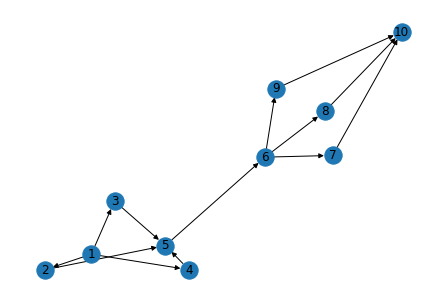

In [68]:
g=nx.DiGraph()
g.add_edge('1','2', weight=1.2)
g.add_edge('1','3', weight=1.3)
g.add_edge('1','4', weight=1.4)
g.add_edge('2','5', weight=1.5)
g.add_edge('3','5', weight=1.6)
g.add_edge('4','5', weight=1.7)
g.add_edge('5','6', weight=1.1)
g.add_edge('6','7', weight=1.3)
g.add_edge('6','8', weight=1.3)
g.add_edge('6','9', weight=1.4)
g.add_edge('7','10', weight=1.2)
g.add_edge('8','10', weight=1.9)
g.add_edge('9','10', weight=1.7)

plt.clf()
nx.draw(g, with_labels=True)
plt.show()



In [55]:
user1 = 'A'
user2 = 'J'
g_i = g.copy()
parent = {key: -1 for key in nx.nodes(g)}
max_flow = 0 
while BFS(g, user1, user2, parent) :
    path_flow = float("Inf")
    s = user2
    while(s != user1):
        path_flow = min(path_flow, g[parent[s]][s]["weight"])
        s = parent[s]
    
    max_flow += path_flow
    
    v = user2 
    
    while(v != user1):
        u = parent[v]
        g[u][v]['weight'] = max(0, g[u][v]['weight'] - path_flow)
            
        if not g.has_edge(v,u) :
            g.add_edge(v,u) 
            g[v][u]["weight"] = 0
        g[v][u]["weight"] += path_flow
        
        v = parent[v]

visited ={key: False for key in nx.nodes(g)}
dfs(g,user1,visited)

for i in nx.nodes(g):
    for j in g[i] :
        if (g[i][j]["weight"] == 0)  and (g_i[i][j]["weight"] > 0) and (visited[i]):
            print(str(i) + " - " + str(j))

E - F


## 3. Implementation of the frontend

### Visualization 1 - Visualize the overall features of the graph

$\cdot$ **a table** with these informations requested i.e.  

$\cdot$ $\cdot$ Whether the graph is directed or not 
       
$\cdot$ $\cdot$ Number of users 
       
$\cdot$ $\cdot$ Number of answers/comments 
       
$\cdot$ $\cdot$ Average number of links per user 
       
$\cdot$ $\cdot$ Density degree of the graph 
       
$\cdot$ $\cdot$ Whether the graph is sparse or dense 

$\cdot$ **a plot of the density distribution of the graph provided as input**

The degree distribution P(k) of a graph is then defined to be the fraction of nodes in the graph with degree k.\
Thus if there are n nodes in total in a graph and $n_k$ of them have degree k, we have $$ P(k)=\frac {n_{k}}{n}.$$

In [78]:
import plotly.graph_objects as go

def visualization1(Graph):
    '''
    input:
    - Graph
    output:
    -table with some important features that characterize the graph given like input
    -histogram for the nodes's degree distribution
    '''
    isdirected, numbernodes, numberedges, average_, densitydegree, graphmode =functionality_1(Graph)
    fig = go.Figure(data=[go.Table(header=dict(values=['Graph features', 'Values']),
                                   cells=dict(values=[['Graph directed', 'Number of users', 'Number of answers/comments', 'Average number of links per user', 'Density degree of the graph', 'Is the graph sparse or dense?'], [isdirected , numbernodes
                                   ,numberedges, average_ , densitydegree, graphmode  ]]))
                         ])
    
    n_nodes=n_users(Graph)
    nodes_degree=[Graph.degree(node) for node in Graph.nodes]
    m=min(nodes_degree)
    M=max(nodes_degree)
    k=np.arange(m,M+1)
    Pk_vector=[0 for i in range(0, M)]
    for nodesdegree in nodes_degree:
        Pk_vector[nodesdegree-1] += 1
    for i in range(len(Pk_vector)):
        Pk_vector[i] = Pk_vector[i]/n_nodes
    
    plt.figure(figsize=(28,10))
    plt.bar(k, Pk_vector)
    plt.xlabel('Degree')
    plt.ylabel('Density')
    plt.title('Distribution of nodes degree')
        
    return(fig.show())

Hello! Print a integer number between 1 and 4.  1


You have selected the functionality 1.. so you are going to get the overall features of a graph


Choose one of the three graphs! Print a number between 1, 2, 3.   1


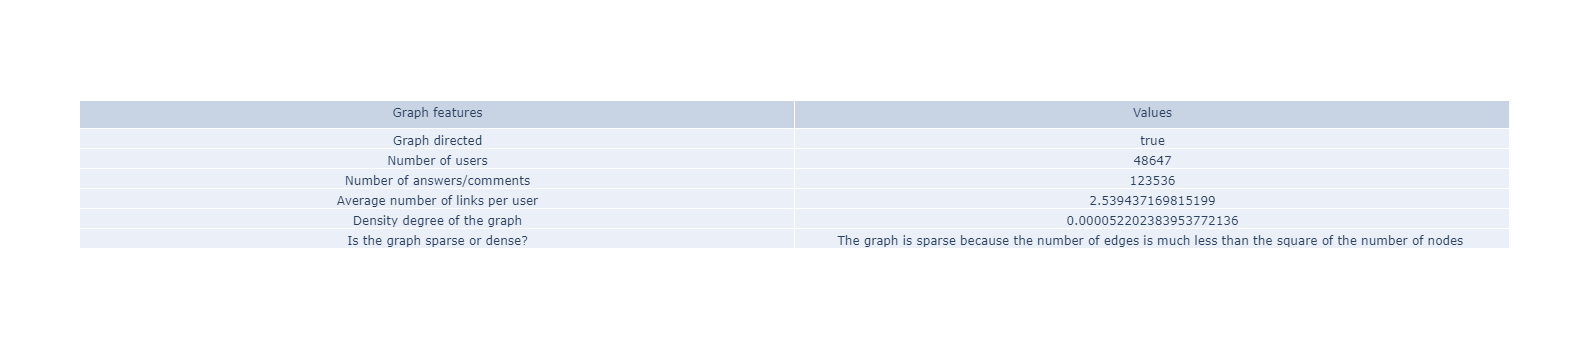

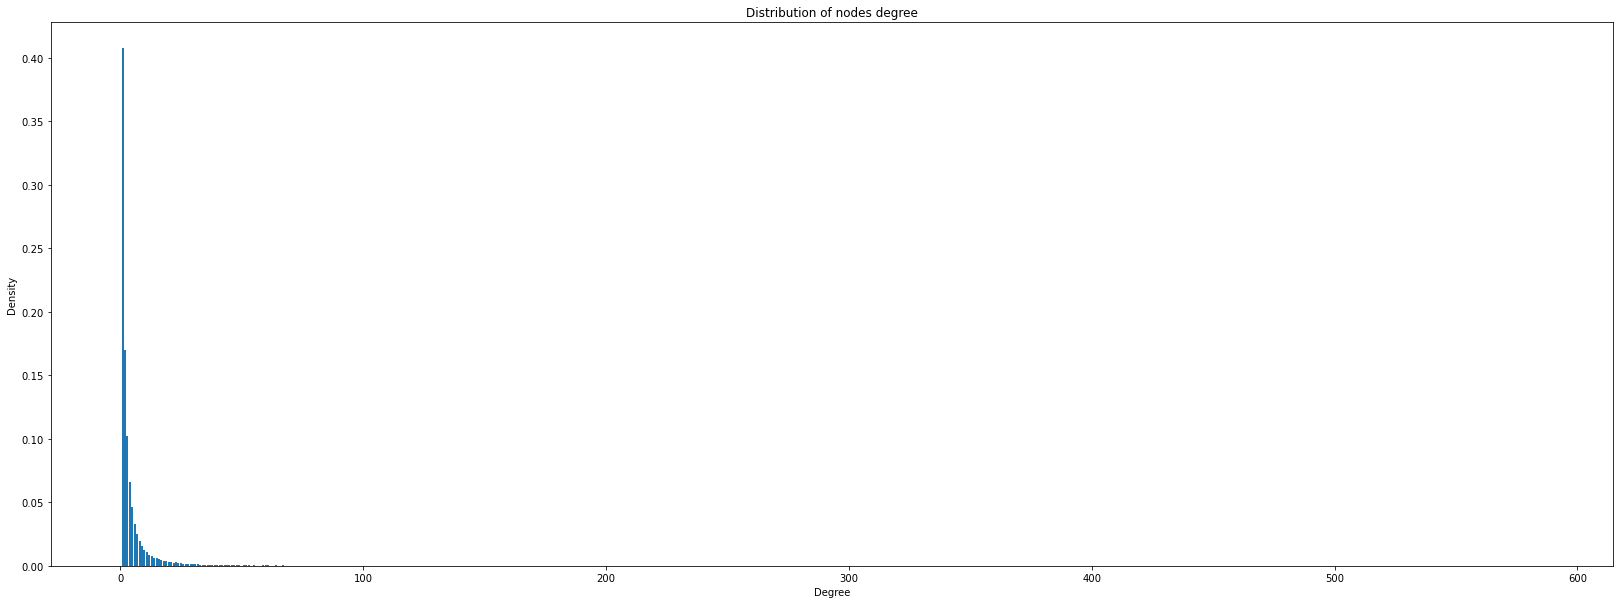

In [79]:
var = int(input("Hello! Print a integer number between 1 and 4. "))
if var==1:
    print("You have selected the functionality 1.. so you are going to get the overall features of a graph")
    g = int(input("Choose one of the three graphs! Print a number between 1, 2, 3.  " ))
    if g==1:
        visualization1(G_a2q) 
    if g==2:
        visualization1(G_c2q)
    if g==3:
        visualization1(G_c2a)
if var==2:
    print("You have selected the functionality 2")
    
    
    

### Visualization 4 - Visualize the overall features of the graph

The function should return the minimum number of links (considering their weights) required to disconnect the two users.

In [26]:
edge_to_remove

[('19068', '102529'),
 ('19068', '411247'),
 ('19068', '282000'),
 ('408089', '361427')]

## 4. Algorithmic question

A number n of kids are in a camp. Between some k pairs of them (a kid can be part of more than one pairs) there are often fights. At night there are two dormitories where the kids can sleep. We want, if possible, to assign each kid in one of the two dormitories in such a way that each pair of kids that fights often is assigned to a different dormitory. (There are no space problems and the two dormitories can have different number of kids.)

Give an algorithm that is linear in n and k that is able to answer whether such an assignment is possible and, if so, return one.

In [32]:
def my_algo(kids, pairs):
    '''
    Input:
        - kids : list of kids in the camp
        - pairs : list of pairs of kids
    '''
    
    dorm_1 = [] # List for the first dormitory
    dorm_2 = [] # List for the second dormitory
    visited_kids = [] # list of visited kids
    
    # Focus on the pairs to divide
    for pair in pairs:
        if (pair[0] not in visited_kids) & (pair[1] not in visited_kids):
            visited_kids.append(pair[0]) # Append it to the list of visited
            dorm_1.append(pair[0]) # Assign it to the first dormitory
            
            visited_kids.append(pair[1]) # Append it to the list of visited
            dorm_2.append(pair[1]) # Assign it to the second dormitory
        
        elif (pair[0] in visited_kids) & (pair[1] not in visited_kids):
            # we put the other kid in the pair
            if pair[0] in dorm_1 :
                dorm=dorm_2
            else :
                dorm=dorm_1
            visited_kids.append(pair[1])
            dorm.append(pair[1])
        
        elif (pair[0] not in visited_kids) & (pair[1] in visited_kids):
            # we put the other kid in the pair
            if pair[1] in dorm_1 :
                dorm=dorm_2
            else :
                dorm=dorm_1
            visited_kids.append(pair[0]) 
            dorm.append(pair[0])
           
    # Assign all the others kids in the first dormitory
    for kid in kids:
        if kid not in visited_kids:
            visited_kids.append(kid)
            dorm_1.append(kid)
            
    # Check if we have divided all the fighting couples
    check = True # Initialize a counter
    for pair in pairs:
        if (pair[0] in dorm_1) & (pair[1] in dorm_1):
            print('Two fighting kids in dorm 1!')
            check = False
        if (pair[0] in dorm_2) & (pair[1] in dorm_2):
            print('Two fighting kids in dorm 2!')
            check = False
        
    if not check:
        print("It's impossible to assign these kids in different dorms..")
    else:
        print('First dorm:', dorm_1, '\nSecond dorm:', dorm_2)


Test it with different examples.

In [33]:
pairs = [(1,3),(4,1),(2,4)]
kids = [1,2,3,4,5,6]
my_algo(kids, pairs)

First dorm: [1, 2, 5, 6] 
Second dorm: [3, 4]


In [34]:
pairs = [(1,3),(4,1),(3,4)]
kids = [1,2,3,4,5,6]
my_algo(kids, pairs)

Two fighting kids in dorm 2!
It's impossible to assign these kids in different dorms..


In [35]:
pairs = [(1,3),(4,1),(2,4),(2,1)]
kids = [1,2,3,4,5,6]
my_algo(kids, pairs)

Two fighting kids in dorm 1!
It's impossible to assign these kids in different dorms..
